<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/6Sates_ClusterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google drive

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
!pip install wget

In [40]:
import pandas as pd
import wget 
from PIL import Image

from tqdm import tqdm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os
from pandas import Series, datetime
from pandas.plotting import scatter_matrix, autocorrelation_plot
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier
from sklearn.mixture import GaussianMixture

# Cluster Result Analysis

In [41]:
maryland_sd_inertia_6states_filtered = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/Covid19-data/Maryland_Inertia_Data/Maryland_inertia_clusterlabeled_Oct20.csv',low_memory=False)
maryland_sd_inertia_6states_filtered.head(2)

State Postal Code  ...  COVID death rate  cluster_label
0  Iowa          IA  ...               0.0              0
1  Iowa          IA  ...               0.0              0

[2 rows x 46 columns]

In [42]:
maryland_sd_inertia_6states_filtered.head(2)

State Postal Code  ...  COVID death rate  cluster_label
0  Iowa          IA  ...               0.0              0
1  Iowa          IA  ...               0.0              0

[2 rows x 46 columns]

## Cluster -1

From analysis: Here one county is forming a cluster. That county is 'New York County'

In [43]:
maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 1]['New cases/1000 people'].shape

(287,)

In [44]:
cluster_1= maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 1]
cluster_1.reset_index(drop=True)

State Postal Code  ...  COVID death rate  cluster_label
0    New York          NY  ...              0.00              1
1    New York          NY  ...              0.00              1
2    New York          NY  ...              0.00              1
3    New York          NY  ...              0.00              1
4    New York          NY  ...              0.00              1
..        ...         ...  ...               ...            ...
282  New York          NY  ...              9.42              1
283  New York          NY  ...              9.42              1
284  New York          NY  ...              9.42              1
285  New York          NY  ...              9.42              1
286  New York          NY  ...              9.42              1

[287 rows x 46 columns]

In [45]:
cluster_1['New cases/1000 people']

37023    0.0000
37024    0.0000
37025    0.0000
37026    0.0000
37027    0.0000
          ...  
37305    0.0434
37306    0.0501
37307    0.0405
37308    0.0391
37309    0.0420
Name: New cases/1000 people, Length: 287, dtype: float64

In [46]:
cluster_1.head(2)

State Postal Code  ...  COVID death rate  cluster_label
37023  New York          NY  ...               0.0              1
37024  New York          NY  ...               0.0              1

[2 rows x 46 columns]

In [47]:
#states of cluster one

cluster_1.State.unique()


array(['New York'], dtype=object)

In [48]:
#min max of new cases by group

cluster_1.groupby(['CTNAME']).agg({'New cases/1000 people': ['mean', 'min', 'max']})

New cases/1000 people             
                                 mean  min     max
CTNAME                                            
New York County              0.499947  0.0  3.4561

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


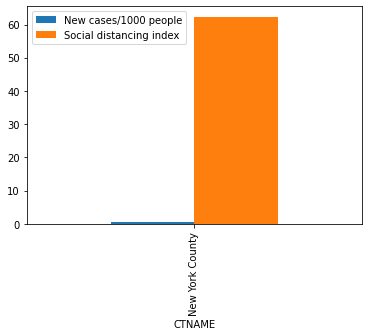

In [49]:
cluster_1.groupby(["CTNAME"])['New cases/1000 people', 'Social distancing index'].mean().plot(kind='bar')

In [50]:
## Min value of all column

cluster_1.min(axis=0) # will return min value of each column

State                                           New York
Postal Code                                           NY
STFIPS                                                36
CTFIPS                                             36061
CTNAME                                   New York County
Social distancing index                               28
% staying home                                        36
Trips/person                                        1.29
% out-of-county trips                               38.3
% out-of-state trips                                 6.5
Miles/person                                         7.3
Work trips/person                                   0.23
Non-work trips/person                               1.05
New COVID cases                                        0
Population                                       1628701
% change in consumption                            -54.1
date                                          2020-01-01
Transit mode share             

In [51]:
## Max value of all column

cluster_1.max(axis=0) # will return max value of each column

State                                           New York
Postal Code                                           NY
STFIPS                                                36
CTFIPS                                             36061
CTNAME                                   New York County
Social distancing index                               89
% staying home                                        75
Trips/person                                        3.27
% out-of-county trips                               63.6
% out-of-state trips                                22.3
Miles/person                                        59.3
Work trips/person                                   0.76
Non-work trips/person                               2.65
New COVID cases                                     7837
Population                                       1628701
% change in consumption                             15.9
date                                          2020-10-13
Transit mode share             

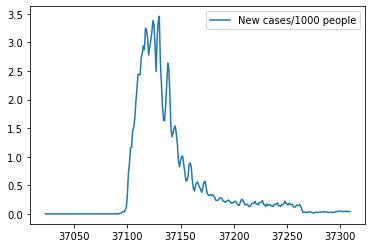

In [52]:
cluster_1[['date','New cases/1000 people']].plot()

In [53]:
cluster_1['date'].unique()

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

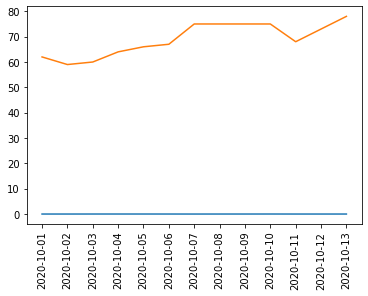

In [54]:
plt.figure()

date_list = ['2020-10-01', '2020-10-02',
       '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
       '2020-10-11', '2020-10-12', '2020-10-13']

filter_data = cluster_1[cluster_1['date'].isin(date_list)]
x = filter_data['date']
y1 = filter_data['New cases/1000 people'] 
y2 = filter_data['Social distancing index']


plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


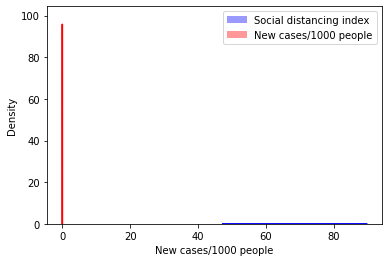

In [55]:
# Method 1: on the same Axis
date_list = ['2020-10-01', '2020-10-02',
       '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
       '2020-10-11', '2020-10-12', '2020-10-13']

filter_data = cluster_1[cluster_1['date'].isin(date_list)]

sns.distplot( (filter_data['Social distancing index']) , color="blue", label='Social distancing index')
sns.distplot( filter_data['New cases/1000 people'] , color="red", label='New cases/1000 people')
plt.legend()
 
plt.show()


This code is not working. I was trying to plot this link: https://stackoverflow.com/questions/43382051/how-to-plot-min-max-line-plot-in-python-pandas


data = cluster_1.groupby('date')['New cases/1000 people'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
data.reset_index(inplace=True)

ax  = data.plot(x='date', y='Mean', c='white')
plt.fill_between(x='date',y1='Low Value',y2='High Value', data=data)

## Cluster -4



### Different Analysis

In [56]:
maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 4]['New cases/1000 people'].shape

(588,)

In [57]:
cluster_4= maryland_sd_inertia_6states_filtered[maryland_sd_inertia_6states_filtered['cluster_label'] == 4]
cluster_4.reset_index(drop=True)

State Postal Code  ...  COVID death rate  cluster_label
0    New York          NY  ...              0.00              4
1    New York          NY  ...              0.00              4
2    New York          NY  ...              0.00              4
3    New York          NY  ...              0.00              4
4    New York          NY  ...              0.00              4
..        ...         ...  ...               ...            ...
583     Texas          TX  ...              2.63              4
584     Texas          TX  ...              2.69              4
585     Texas          TX  ...              2.72              4
586     Texas          TX  ...              2.74              4
587     Texas          TX  ...              2.74              4

[588 rows x 46 columns]

In [58]:
cluster_4['New cases/1000 people']

39893     0.0000
39894     0.0000
39895     0.0000
39896     0.0000
39897     0.0000
           ...  
109337    0.2192
109340    0.1906
109341    0.2353
109342    0.2289
109343    0.2043
Name: New cases/1000 people, Length: 588, dtype: float64

In [59]:
#states of cluster one

cluster_4.State.unique()


array(['New York', 'Texas'], dtype=object)

In [60]:
#states of cluster one

cluster_4.CTNAME.unique()

array(['Queens County', 'Dallas County', 'Harris County',
       'Tarrant County'], dtype=object)

In [61]:
#min max of new cases by each county of cluster

cluster_4.groupby(['CTNAME']).agg({'New cases/1000 people': ['mean', 'min', 'max']})

New cases/1000 people                
                                mean     min     max
CTNAME                                              
Dallas County               0.237889  0.0315  1.0107
Harris County               0.243668  0.0834  1.0997
Queens County               0.007462  0.0000  0.0740
Tarrant County              0.215992  0.0000  0.5059

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


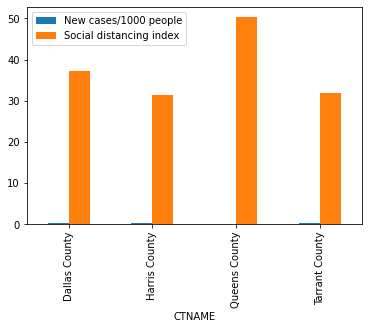

In [62]:
cluster_4.groupby("CTNAME")['New cases/1000 people', 'Social distancing index'].mean().plot(kind='bar')

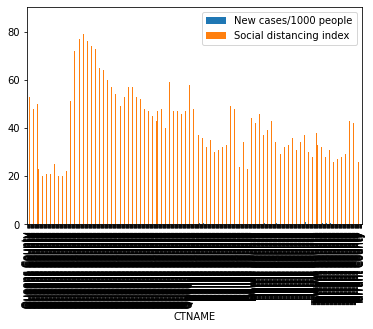

In [63]:
cluster_4.plot(x="CTNAME", y=['New cases/1000 people', 'Social distancing index'], kind="bar")

In [64]:
## Min value of all column

cluster_4.min(axis=0) # will return min value of each column

State                                         New York
Postal Code                                         NY
STFIPS                                              36
CTFIPS                                           36081
CTNAME                                   Dallas County
Social distancing index                             18
% staying home                                      19
Trips/person                                      1.68
% out-of-county trips                             13.8
% out-of-state trips                               0.2
Miles/person                                      10.2
Work trips/person                                 0.16
Non-work trips/person                              1.4
New COVID cases                                      0
Population                                     2084931
% change in consumption                          -53.6
date                                        2020-01-01
Transit mode share                                0.58
% people o

In [65]:
## Max value of all column

cluster_4.max(axis=0) # will return max value of each column

State                                             Texas
Postal Code                                          TX
STFIPS                                               48
CTFIPS                                            48439
CTNAME                                   Tarrant County
Social distancing index                              86
% staying home                                       66
Trips/person                                       4.23
% out-of-county trips                              42.2
% out-of-state trips                                5.1
Miles/person                                       63.9
Work trips/person                                   0.9
Non-work trips/person                              3.58
New COVID cases                                   14129
Population                                      4698619
% change in consumption                            26.9
date                                         2020-10-13
Transit mode share                              

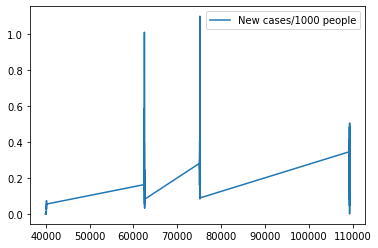

In [66]:
cluster_4[['date','New cases/1000 people']].plot()

In [67]:
cluster_4['date'].unique()

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

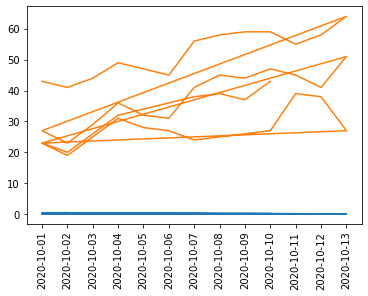

In [68]:
plt.figure()

date_list = ['2020-10-01', '2020-10-02',
       '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
       '2020-10-11', '2020-10-12', '2020-10-13']

filter_data = cluster_4[cluster_4['date'].isin(date_list)]
x = filter_data['date']
y1 = filter_data['New cases/1000 people'] 
y2 = filter_data['Social distancing index']


plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


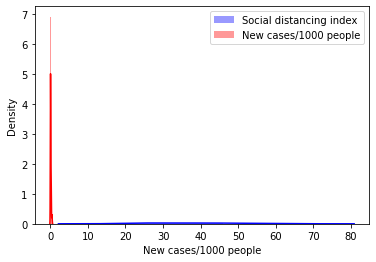

In [69]:
# Method 1: on the same Axis
date_list = ['2020-10-01', '2020-10-02',
       '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
       '2020-10-11', '2020-10-12', '2020-10-13']

filter_data = cluster_4[cluster_4['date'].isin(date_list)]

sns.distplot( (filter_data['Social distancing index']) , color="blue", label='Social distancing index')
sns.distplot( filter_data['New cases/1000 people'] , color="red", label='New cases/1000 people')
plt.legend()
 
plt.show()

New case for each county

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 9 Text major ticklabel objects>)

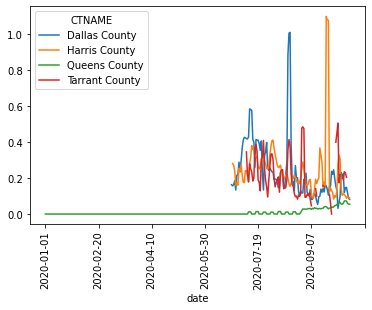

In [70]:
cluster_4.pivot(index='date', columns='CTNAME', values='New cases/1000 people').plot()
plt.xticks(rotation=90)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text major ticklabel objects>)

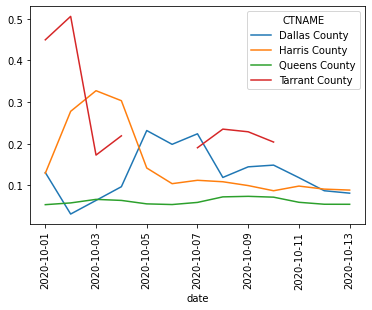

In [71]:
# Method 1: on the same Axis
date_list = ['2020-10-01', '2020-10-02',
       '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
       '2020-10-11', '2020-10-12', '2020-10-13']

filter_data = cluster_4[cluster_4['date'].isin(date_list)]
filter_data.pivot(index='date', columns='CTNAME', values='New cases/1000 people').plot()
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

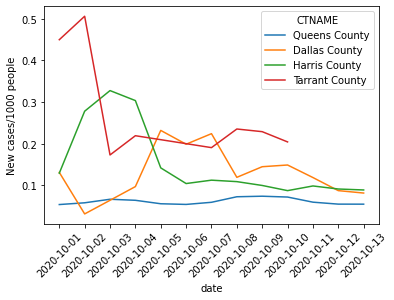

In [72]:
sns.lineplot(data=filter_data, hue='CTNAME', x='date', y='New cases/1000 people')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

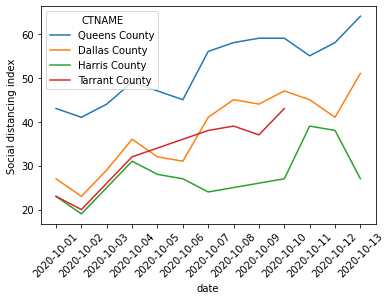

In [73]:
sns.lineplot(data=filter_data, hue='CTNAME', x='date', y='Social distancing index')
plt.xticks(rotation=45)

### Pairplot- All Column

In [74]:
# pairplot with hue day 
sns.pairplot(cluster_4, hue ='CTNAME') 
# to show 
plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f4c1b076bf8> (for post_execute):


KeyboardInterrupt: ignored

### Group Columns

In [75]:
cluster_4.columns

Index(['State', 'Postal Code', 'STFIPS', 'CTFIPS', 'CTNAME',
       'Social distancing index', '% staying home', 'Trips/person',
       '% out-of-county trips', '% out-of-state trips', 'Miles/person',
       'Work trips/person', 'Non-work trips/person', 'New COVID cases',
       'Population', '% change in consumption', 'date', 'Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people', 'New cases/1000 people',
       'Active cases/1000 people', '#days: decreasing COVID cases',
       '% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 p

In [81]:
filter_col= ['Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','% change in consumption','Transit mode share',
       '% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density', '# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people',
       '#days: decreasing ILI cases', 'Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

social_dist= ['CTNAME','Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person',
       'Non-work trips/person','% change in consumption','Transit mode share',
       '% working from home', 'New cases/1000 people']

demographic = ['CTNAME','% people older than 60', 'Median income', '% African Americans',
       '% Hispanic Americans', '% Male', 'Population density',
       'Employment density','# hot spots/1000 people',
       'Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people','% hospital bed utilization', 'Testing capacity',
       'Tests done/1000 people', '% ICU utilization', 'Ventilator shortage',
       'Imported COVID cases', 'COVID exposure/1000 people','New cases/1000 people']

employment = ['CTNAME','Unemployment claims/1000 people',
       'Unemployment rate', '% working from home', 'Cumulative inflation rate','New cases/1000 people']

In [77]:
cluster_4_filter = cluster_4[social_dist]

In [78]:
cluster_4_filter.head(2)

Social distancing index  ...  New cases/1000 people
39893                       58  ...                    0.0
39894                       25  ...                    0.0

[2 rows x 12 columns]

### Pairplot- Using Column Groups 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


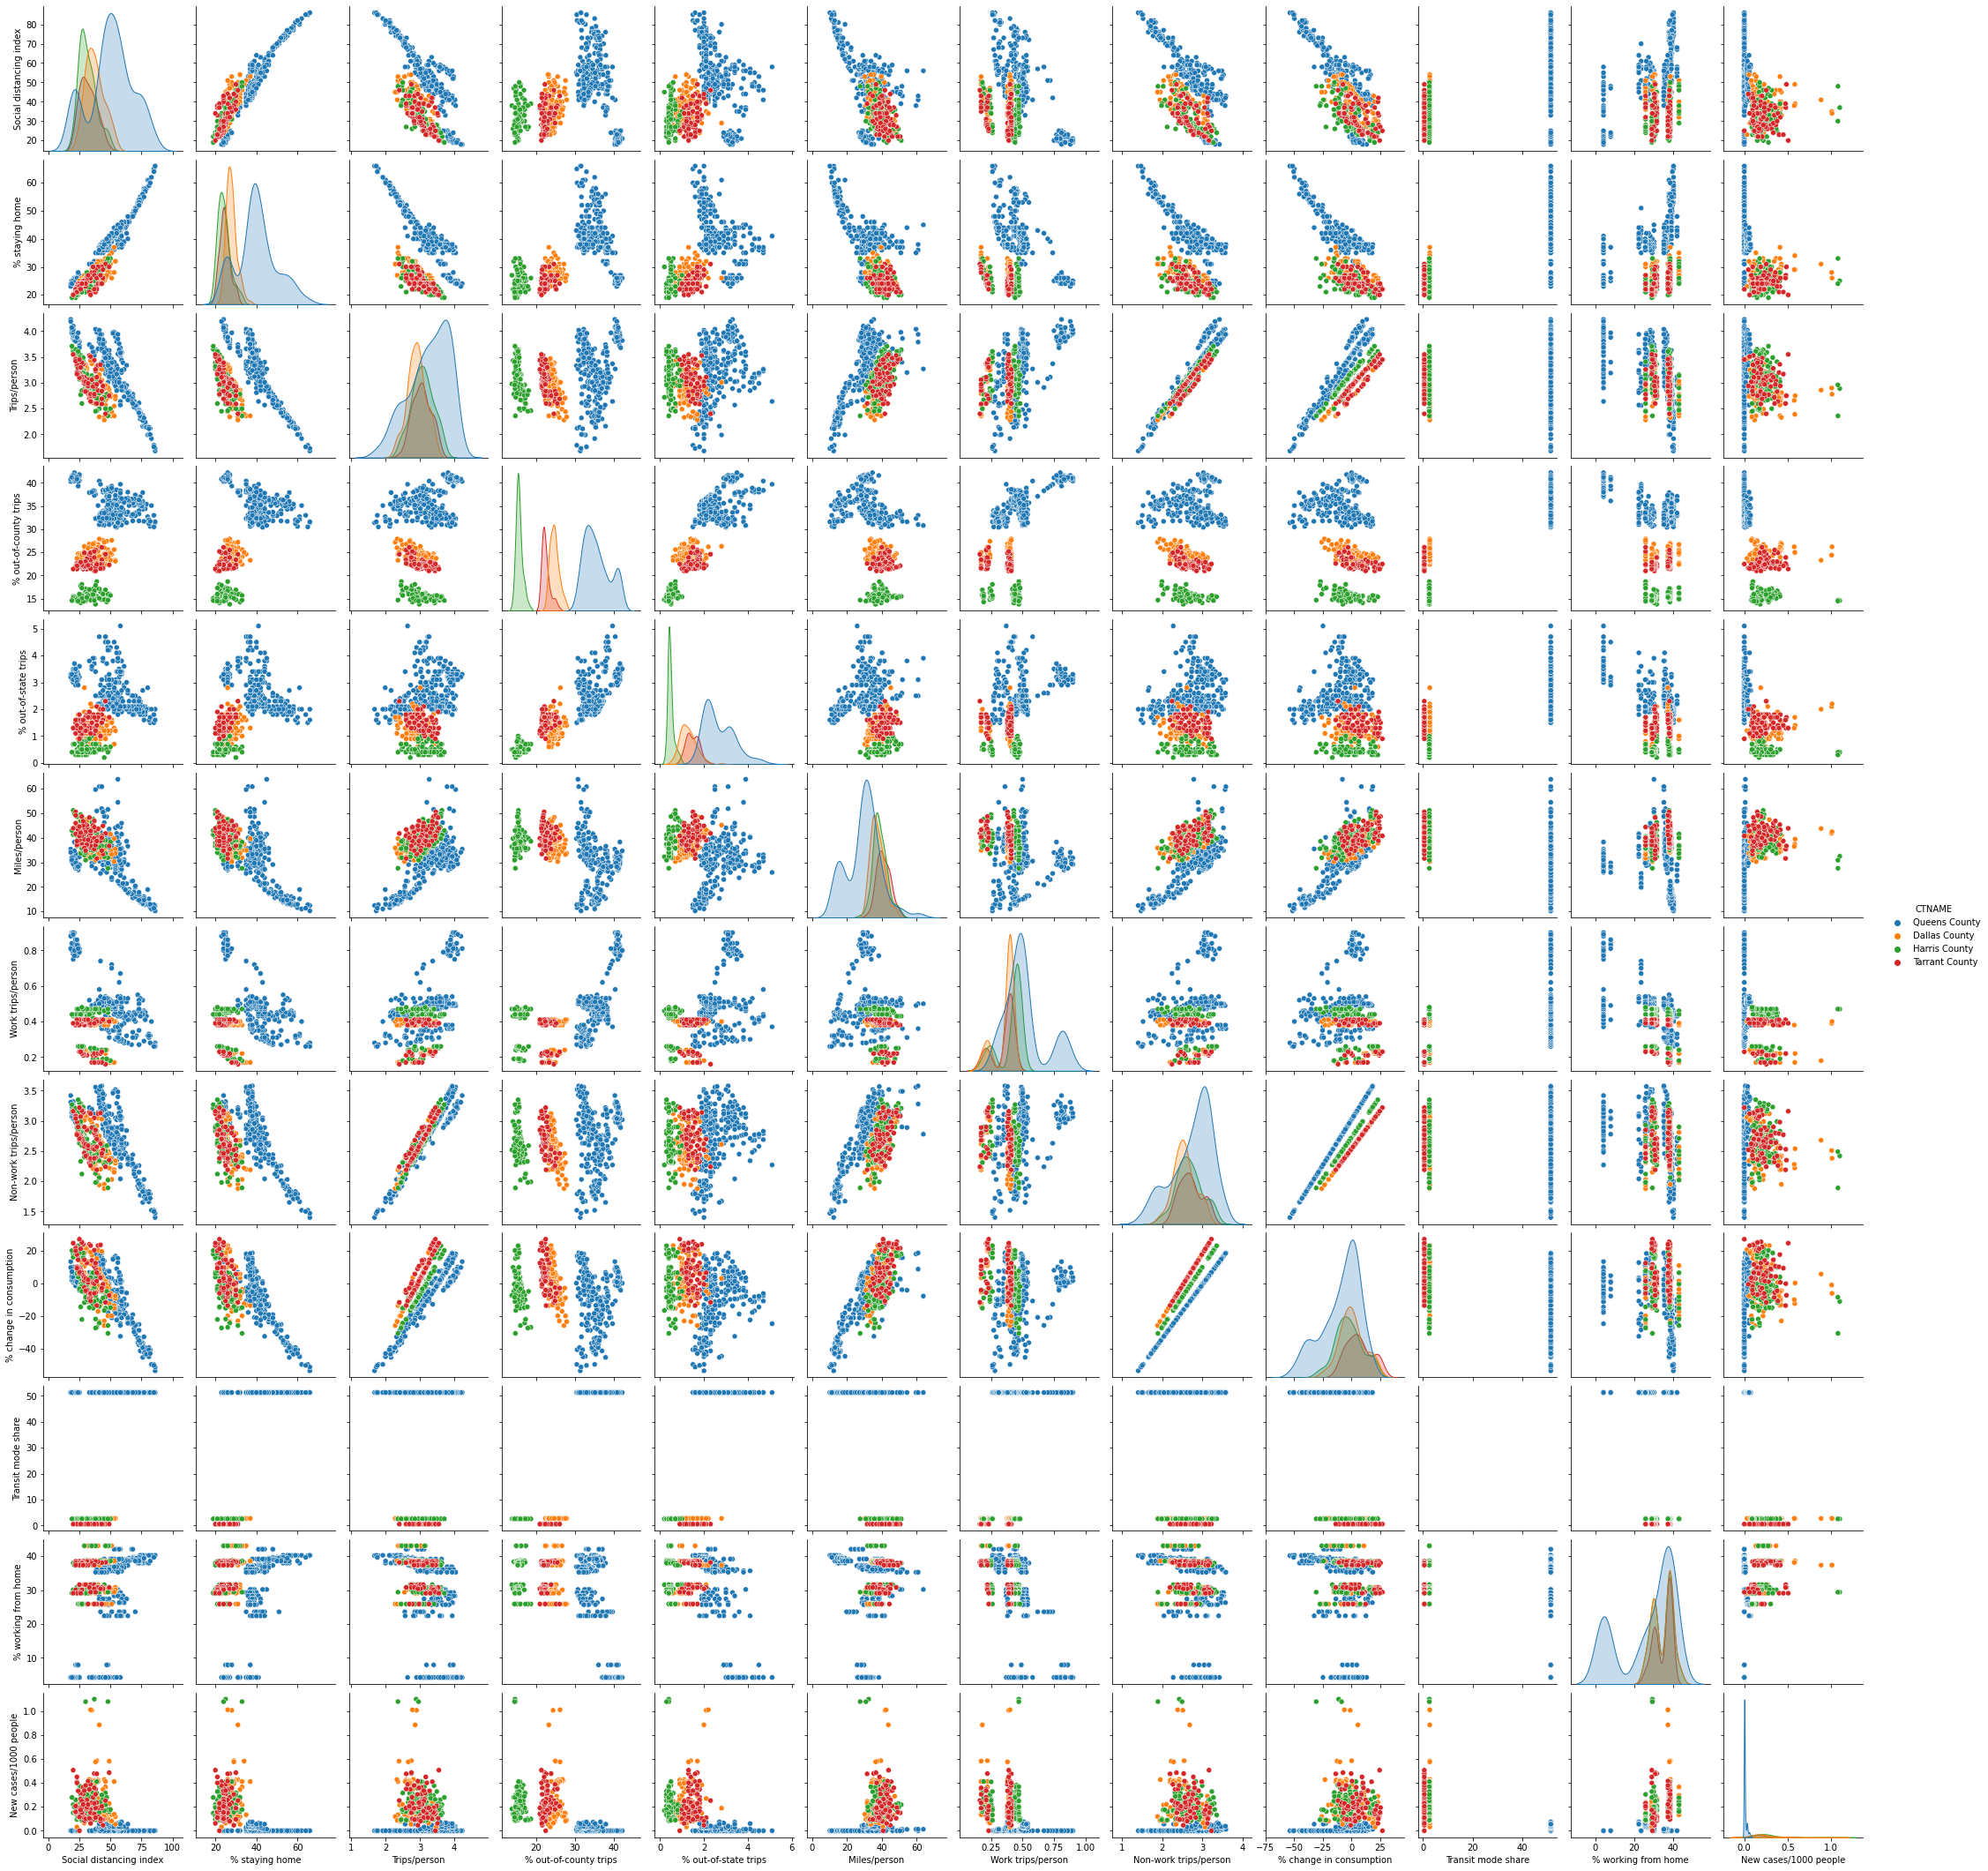

In [83]:
# pairplot with hue day 
sns.pairplot(cluster_4[social_dist], hue ='CTNAME') 
# to show 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

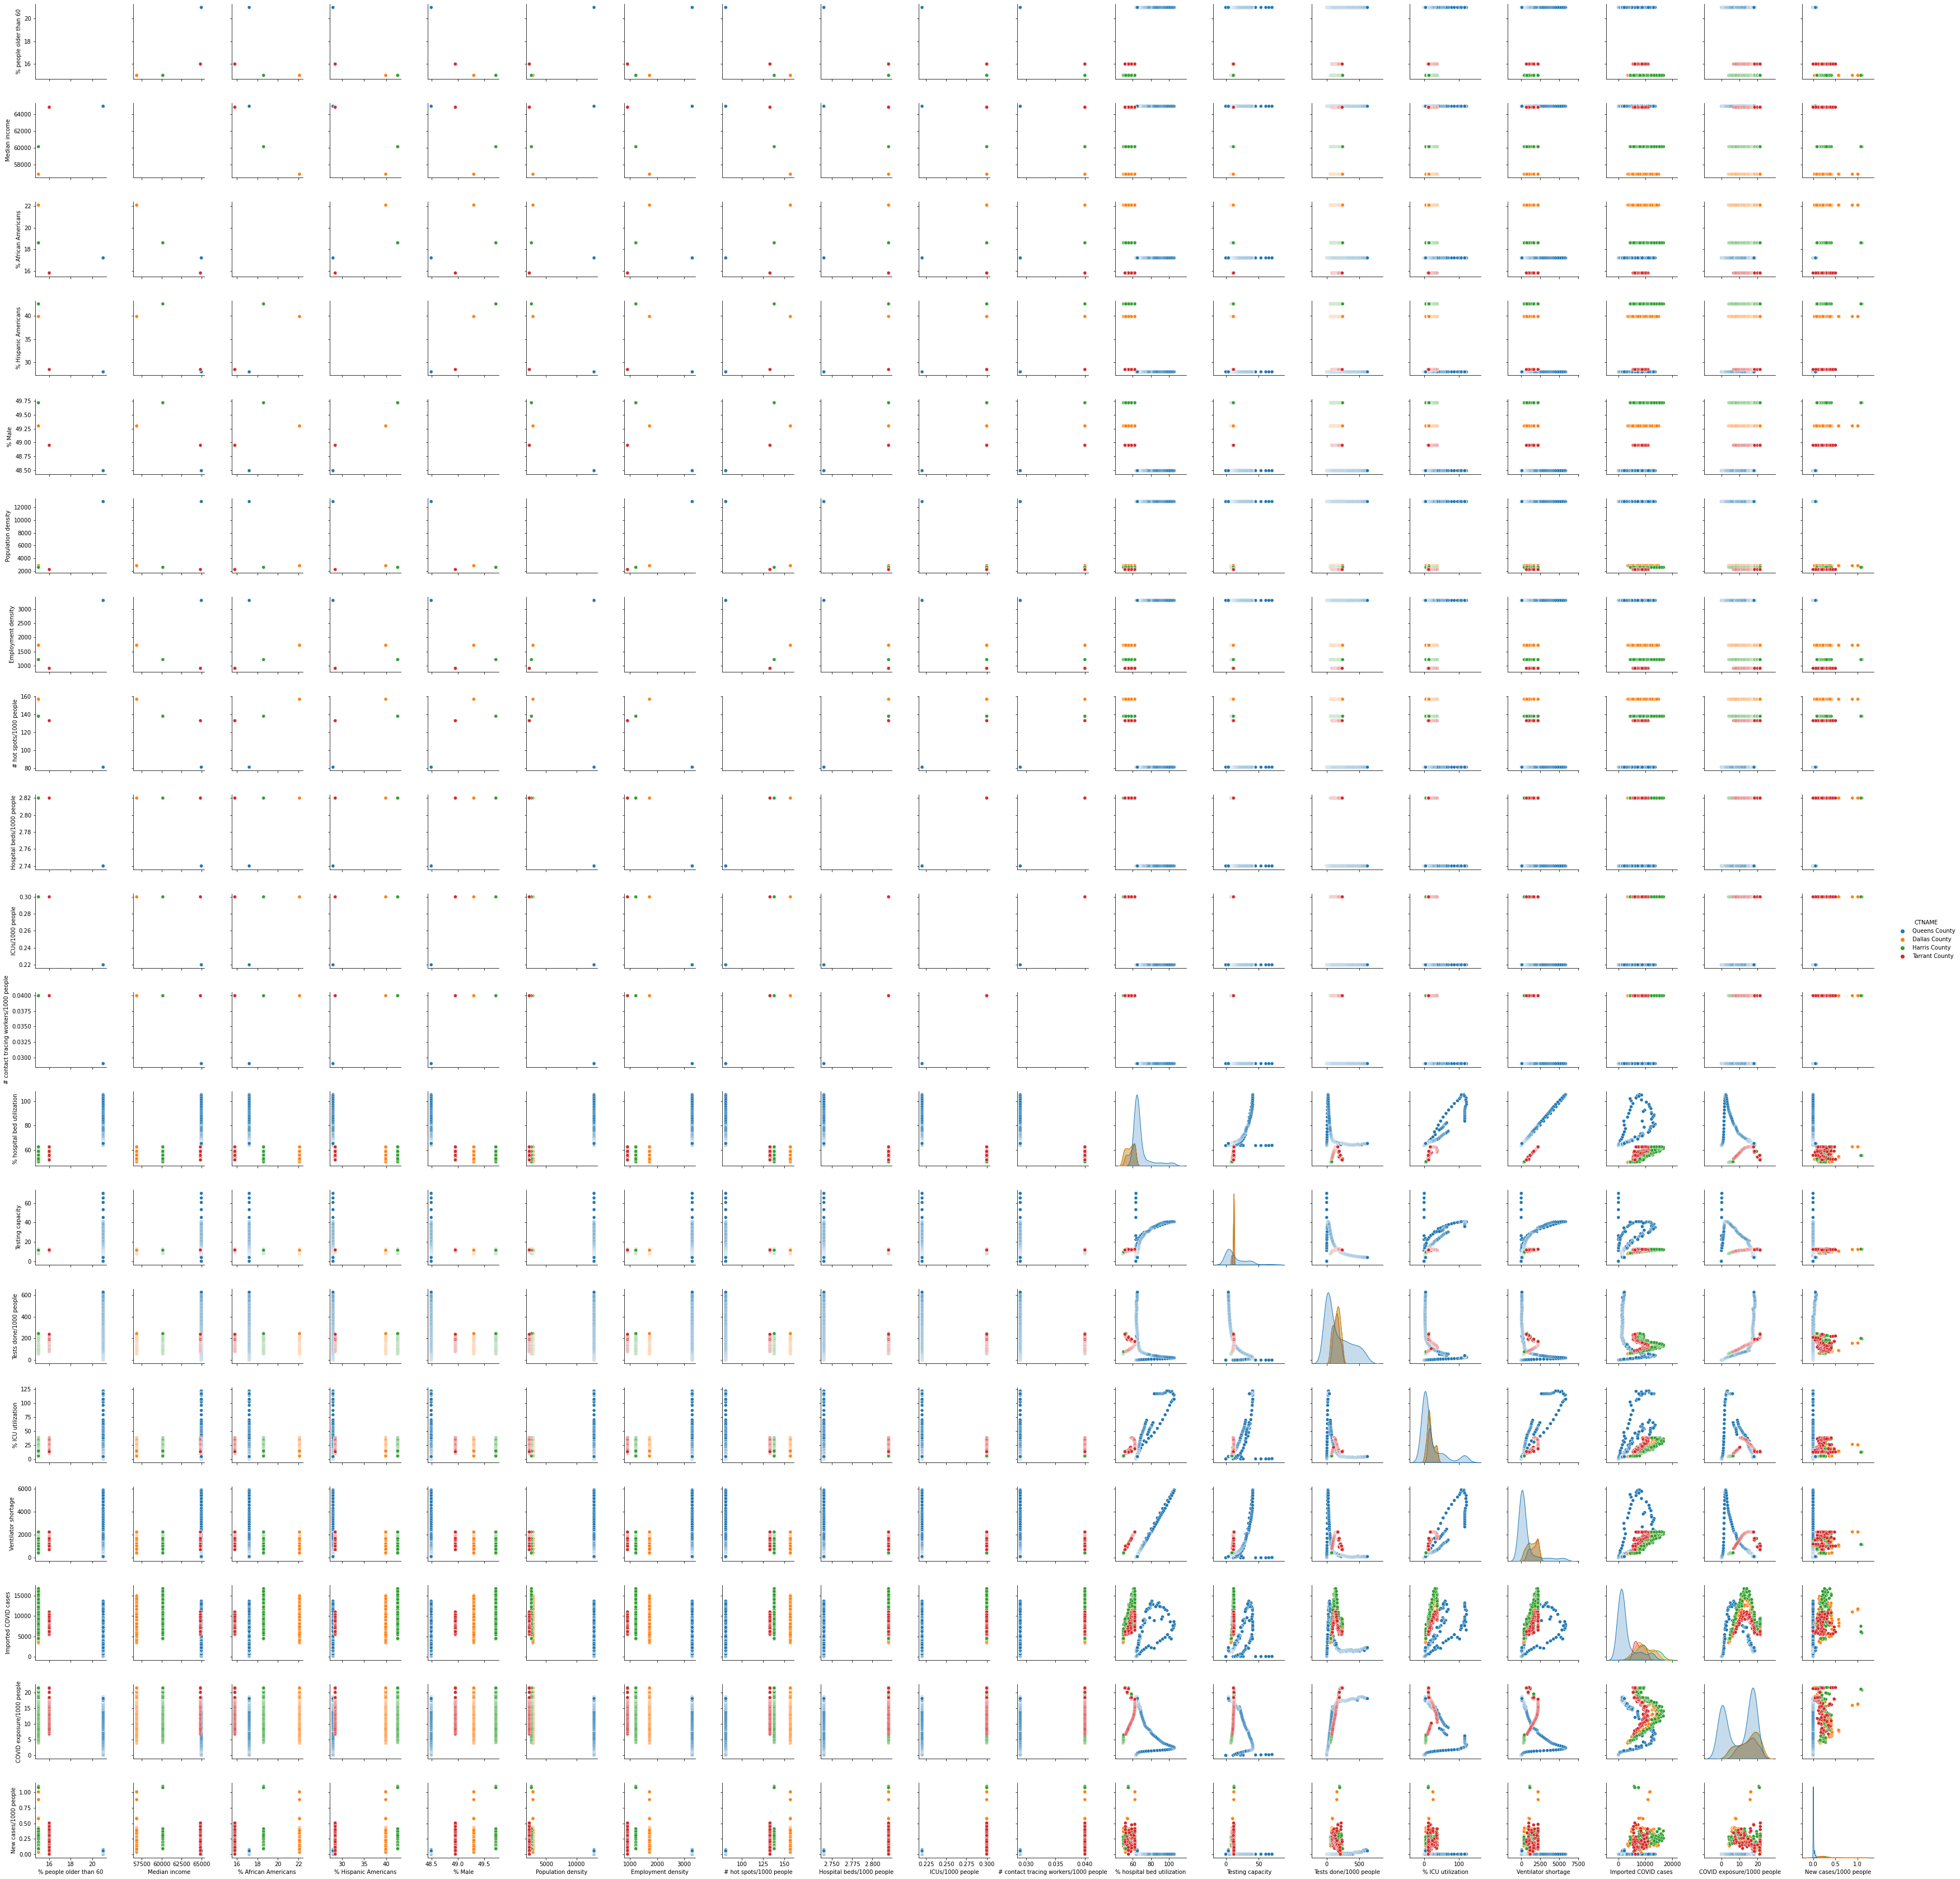

In [84]:
# pairplot with hue day 
sns.pairplot(cluster_4[demographic], hue ='CTNAME') 
# to show 
plt.show()

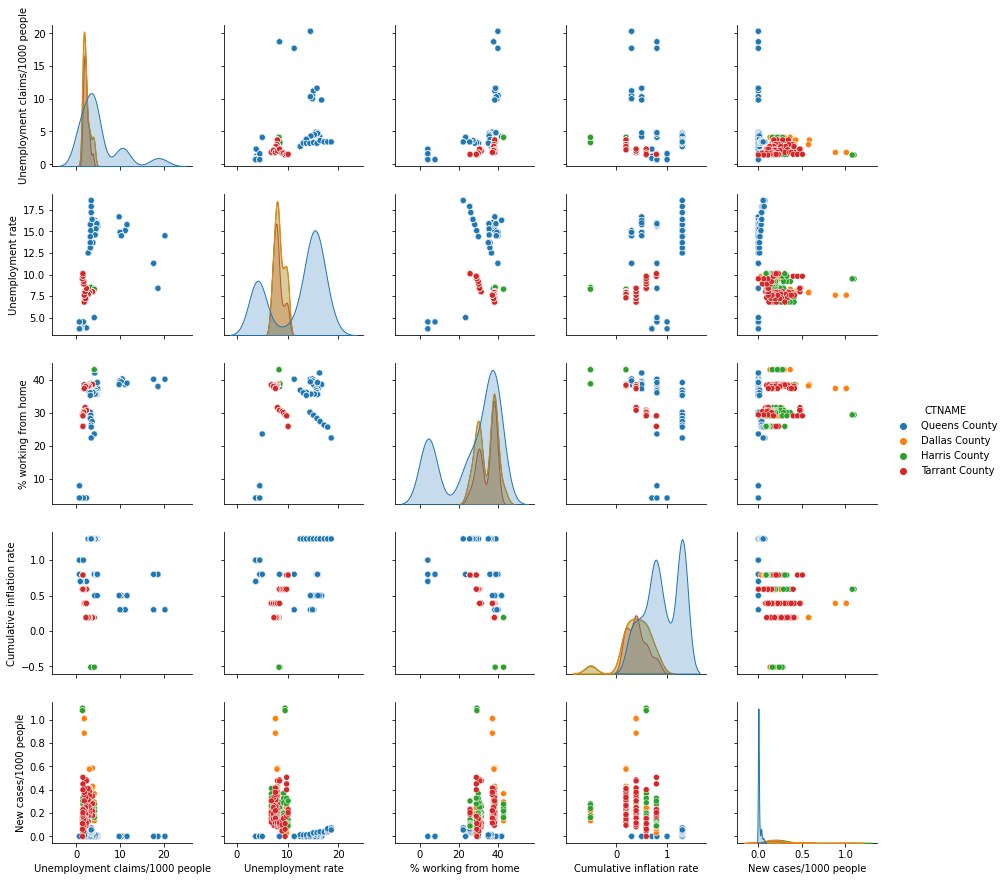

In [85]:
# pairplot with hue day 
sns.pairplot(cluster_4[employment], hue ='CTNAME') 
# to show 
plt.show()

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bc69c5048>,
      dtype=object)

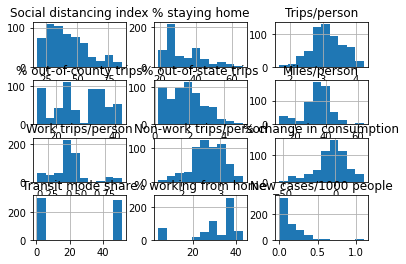

In [86]:
cluster_4[social_dist].hist()

### Correlation Plot

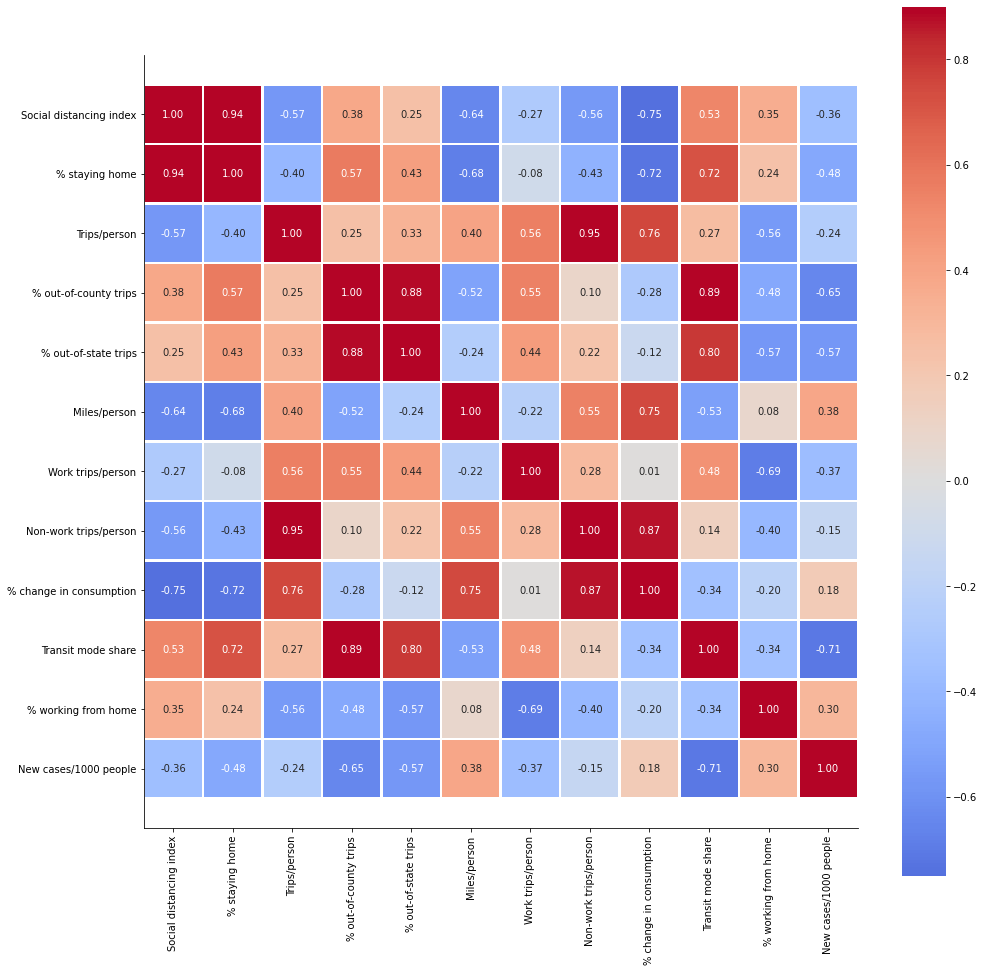

In [87]:
corr = cluster_4[social_dist].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

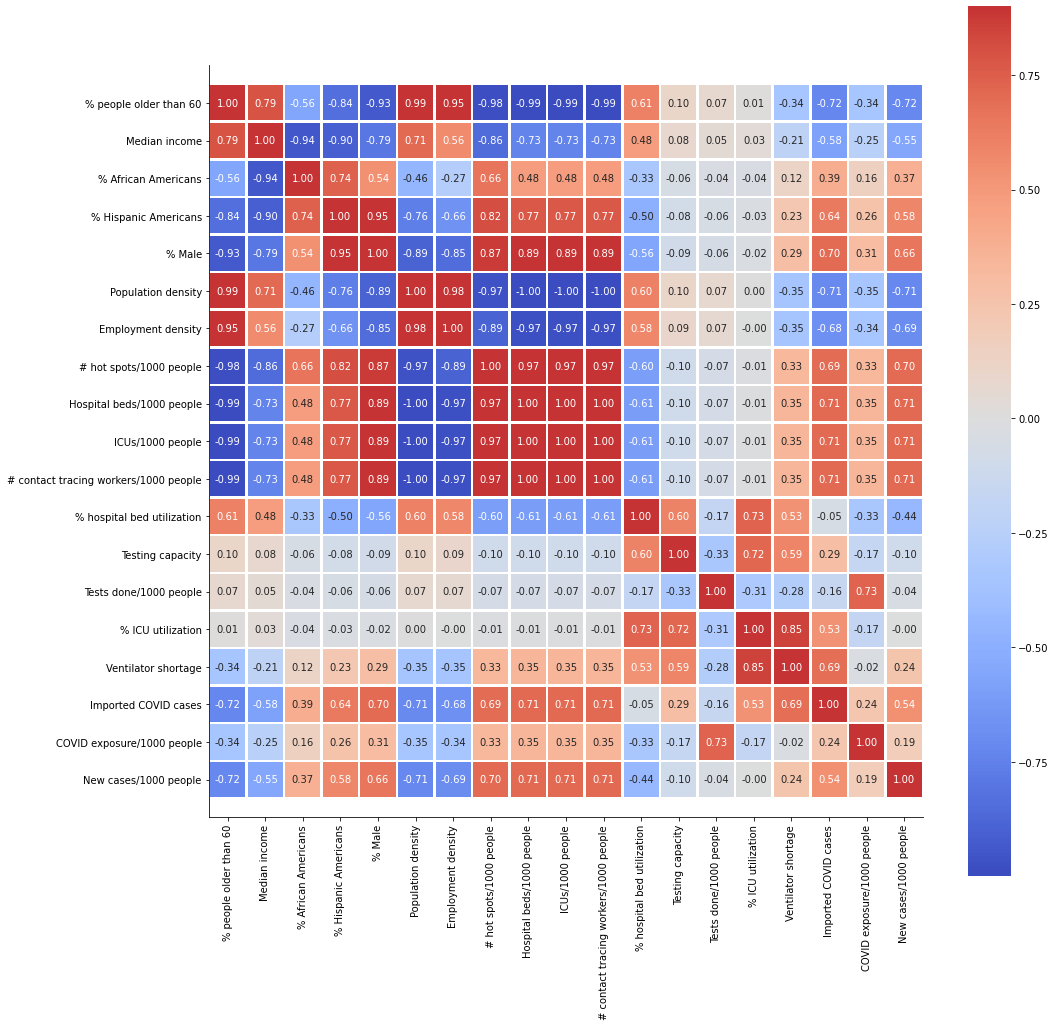

In [88]:
corr = cluster_4[demographic].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)

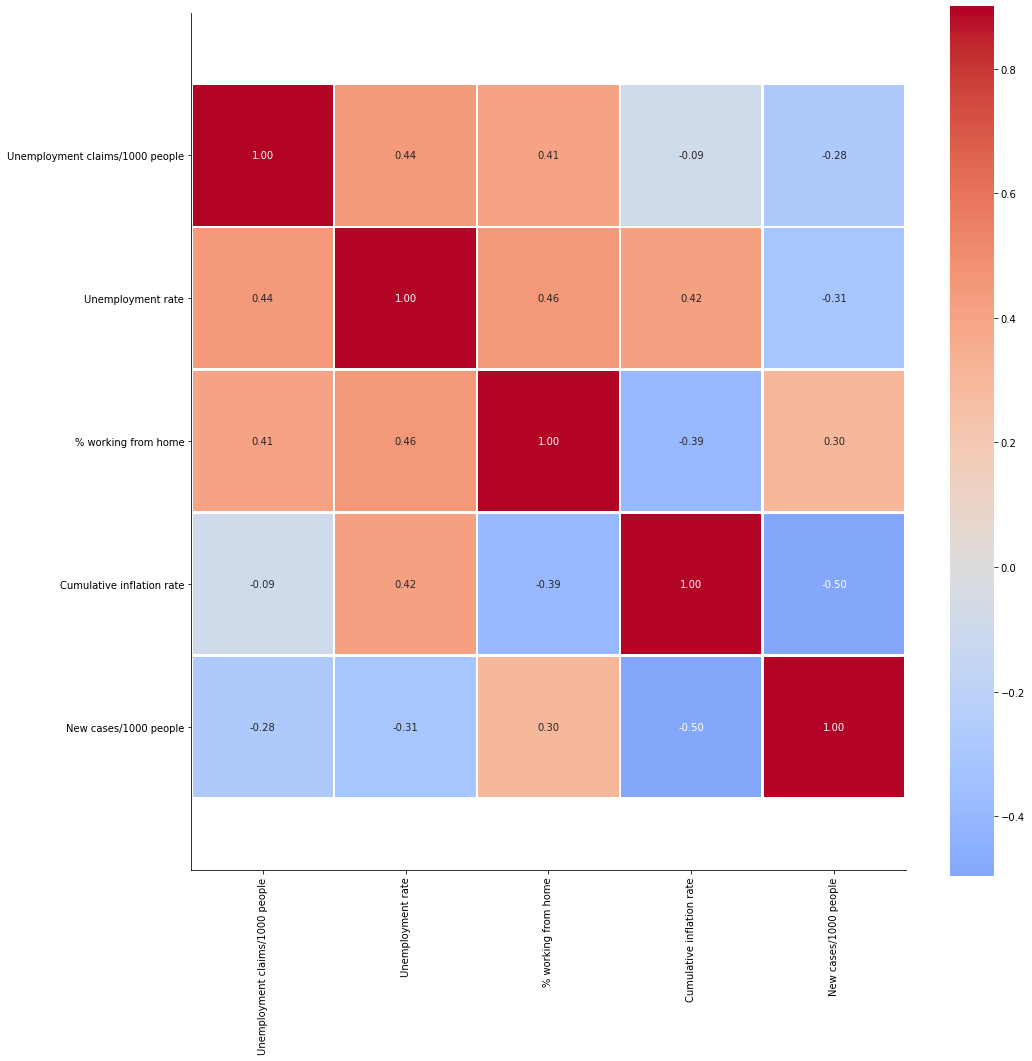

In [89]:
corr = cluster_4[employment].corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 20)